In [24]:
%matplotlib notebook
import numpy as np
import matplotlib
from astropy.table import Table, vstack, join
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from astropy.coordinates import SkyCoord
import astropy.units as u
import plotting_resources as res
import linmix
plt.rc('text', usetex=True)
plt.ion()

rauto_cut = 22.6
frauto_cut = 10**((rauto_cut-23.9)/(-2.5))
f_contam = 0.30*0.122 # 30% times the outlier rate for Q=4
f_close = 0.18 # Correction due to the max slit density

In [25]:
slitcat = Table().read('../catalogs/personal_catalogs/slits_phot_zs_cutonslitdist_rcl.csv', format='csv')
ldpcat = slitcat[np.where((slitcat['Rauto'] < rauto_cut) & 
                          (slitcat['Q'] >= 4) & 
                          (slitcat['slit_distance'] < 1.0))]
cllist = res.load_clusters()
rfmags = Table().read('../catalogs/eazy_colors/ediscs_zldp_zfors_EAzY_outputs.csv', format='csv')
rfmags.rename_column('id', 'ids')

ldpcat = join(ldpcat, rfmags['ids','MAG_AB_rfB', 'MAG_AB_rfU'], keys='ids', join_type='left')
ldpcat['UB_color'] = ldpcat['MAG_AB_rfU'] - ldpcat['MAG_AB_rfB']

# # of objects with Q=4 AND zspec

In [14]:
print(len(slitcat[np.where((slitcat['Rauto'] < rauto_cut) & 
                           (slitcat['Q'] >= 2) & 
                           (slitcat['slit_distance'] < 1.0) &
                           (slitcat['zSpec'] > 0))]))

409


# Convert Rauto cut to M_B cut

In [26]:
highzcl = cllist[np.where(cllist['papername'] == 'cl1216.8-1201')]
highzobj = ldpcat[np.where(abs(ldpcat['zLDP']-0.79) < 0.01)]

In [27]:
targetobj = highzobj[np.where(highzobj['Rauto'] == max(highzobj['Rauto']))]

In [28]:
targetobj['zLDP','Rauto', 'MAG_AB_rfB']

zLDP,Rauto,MAG_AB_rfB
float64,float64,float64
0.7957295775413513,22.597700119018555,-20.88885169894238


<IPython.core.display.Javascript object>


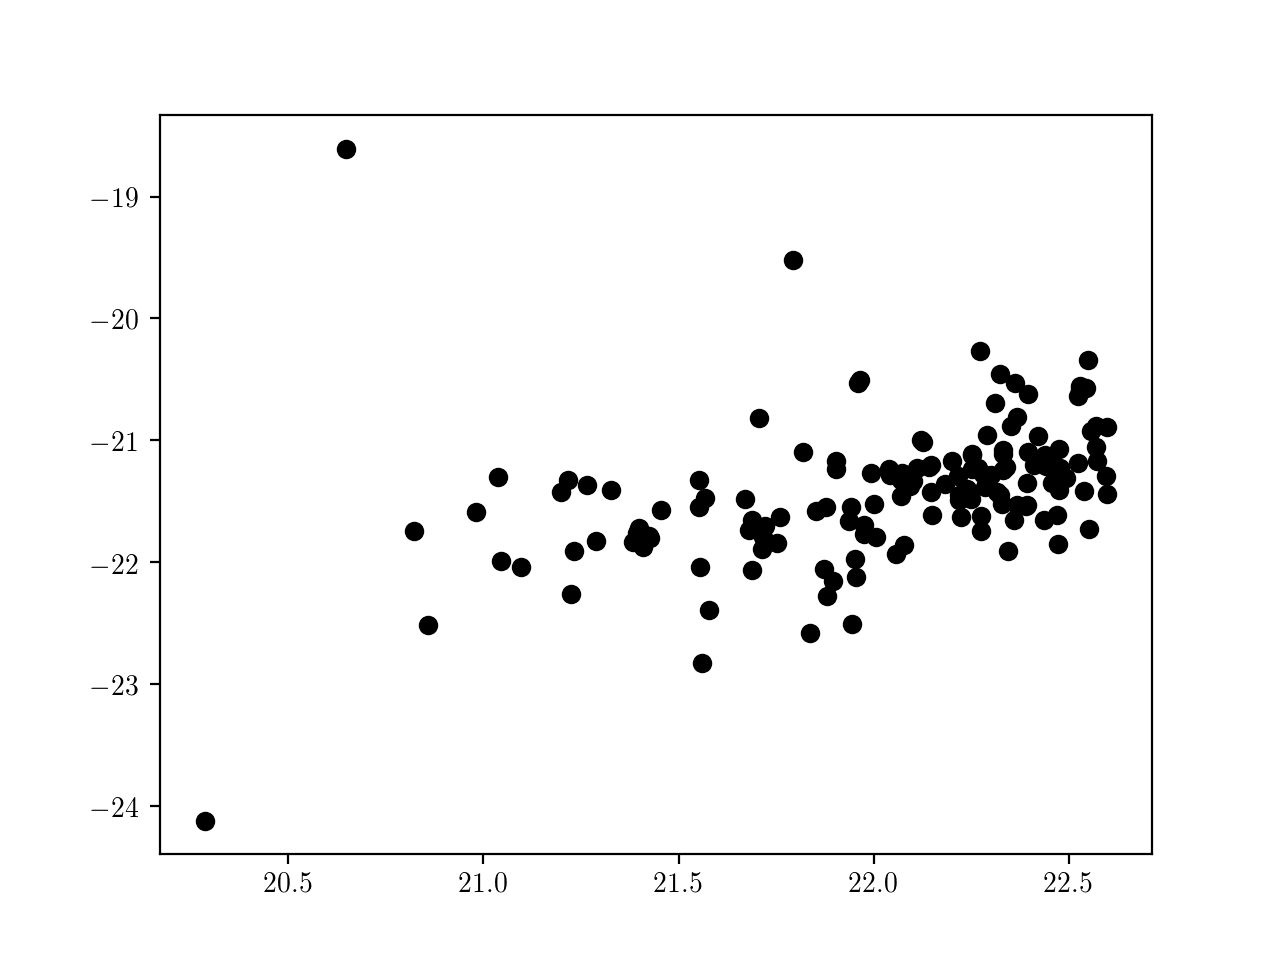

In [29]:
plt.plot(highzobj['Rauto'], highzobj['MAG_AB_rfB'], 'ok')